<a href="https://colab.research.google.com/github/Rohan171819/Deep_Learning./blob/main/Hyper_Parameter_Tuning_in_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import numpy as np

In [114]:
Data=pd.read_csv("/content/Bank Customer Churn Prediction.csv")

In [115]:
Data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [116]:
# One Hot Encoding...
Data=pd.get_dummies(Data,columns=["country","gender"],drop_first=True)

In [117]:
Data.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [118]:
X=Data.drop(columns=["churn"])
Y=Data[["churn"]]

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2)
print(X_train.shape)
print(Y_train.shape)

(8000, 12)
(8000, 1)


In [120]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.fit_transform(X_test)

In [121]:
print(X_train_scaled.shape)

(8000, 12)


In [122]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

# Without Hyper Parmeter Tuning..

> Indented block



In [123]:
# Creating the ANN Architecture..
model=Sequential()
# Creating 3 Nodes in the Hidden Layer and Adding Input data..
model.add(Dense(50,activation="relu",input_dim=12))
model.add(Dense(50,activation="relu"))
model.add(Dense(50,activation="relu"))

#Creating 1 Node in the Output Layer..
model.add(Dense(1,activation="sigmoid"))

In [124]:
# Analyzing the summary of the Neural Network.
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                650       
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 50)                2550      
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,801
Trainable params: 5,801
Non-trainable params: 0
_________________________________________________________________


In [125]:
# Compiling my model..
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [126]:
# Training the Neural Network..
history=model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.4554 - accuracy: 0.8047 - val_loss: 0.4149 - val_accuracy: 0.8194
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3856 - accuracy: 0.8419 - val_loss: 0.3772 - val_accuracy: 0.8419
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3503 - accuracy: 0.8580 - val_loss: 0.3603 - val_accuracy: 0.8537
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3412 - accuracy: 0.8595 - val_loss: 0.3606 - val_accuracy: 0.8506
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3333 - accuracy: 0.8620 - val_loss: 0.3588 - val_accuracy: 0.8537
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3289 - accuracy: 0.8673 - val_loss: 0.3609 - val_accuracy: 0.8494
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3248 - accuracy: 0.8641 - val_loss: 0.3596 - val_accuracy: 0.8500

In [127]:
# Prediction of Neural Network..
Y_Predicted=model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [128]:
# Calulating the accuracy..
from sklearn.metrics import r2_score
r2_score(Y_test,Y_Predicted)

0.09250371102476296

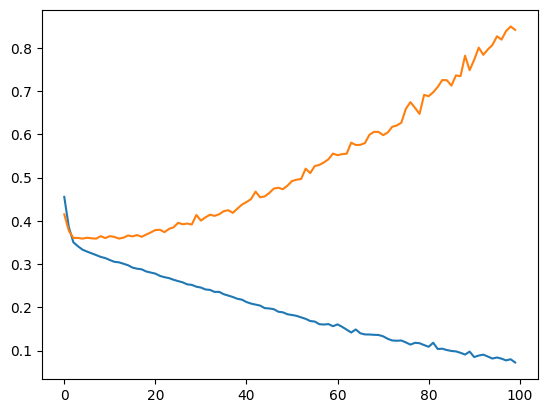

In [129]:
# Plotting the graph of loss..
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

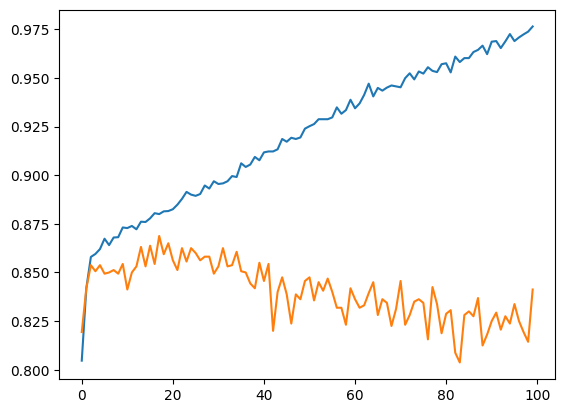

In [130]:
# Plotting the graph of accuracy..
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

# With Hyper Paramter Tuning...

In [131]:
pip install keras-tuner --upgrade

In [132]:
import keras_tuner as kt

Finding the best Optimizer...

In [166]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(50,activation="relu",input_dim=12))
  model.add(Dense(50,activation="relu"))
  model.add(Dense(50,activation="relu"))
  #Creating 1 Node in the Output Layer..
  model.add(Dense(1,activation="sigmoid"))
  optimizer=hp.Choice("Optimizer",["adam","rmsprop","sgd","adadelta"])
  model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])
  return model

In [169]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=5,directory="My_Dir",project_name="Best Optimizer")

In [170]:
tuner.search(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test))

Trial 4 Complete [00h 00m 22s]
val_accuracy: 0.7465000152587891

Best val_accuracy So Far: 0.8019999861717224
Total elapsed time: 00h 01m 28s


In [171]:
tuner.get_best_hyperparameters

<bound method BaseTuner.get_best_hyperparameters of <keras_tuner.tuners.randomsearch.RandomSearch object at 0x7dd741469a50>>

In [172]:
tuner.get_best_hyperparameters()[0].values

{'Optimizer': 'adam'}

In [173]:
model=tuner.get_best_models(num_models=1)[0]

In [174]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                650       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,801
Trainable params: 5,801
Non-trainable params: 0
_________________________________________________________________


In [175]:
# Training the Neural Network..
history=model.fit(X_train_scaled,Y_train,epochs=100,initial_epoch=21,validation_data=(X_test_scaled,Y_test))

Epoch 22/100
250/250 [==============================] - 3s 5ms/step - loss: 0.4095 - accuracy: 0.8264 - val_loss: 0.3670 - val_accuracy: 0.8480
Epoch 23/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3529 - accuracy: 0.8541 - val_loss: 0.3487 - val_accuracy: 0.8555
Epoch 24/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3418 - accuracy: 0.8572 - val_loss: 0.3460 - val_accuracy: 0.8545
Epoch 25/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3350 - accuracy: 0.8615 - val_loss: 0.3456 - val_accuracy: 0.8525
Epoch 26/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3316 - accuracy: 0.8630 - val_loss: 0.3453 - val_accuracy: 0.8600
Epoch 27/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.8648 - val_loss: 0.3506 - val_accuracy: 0.8525
Epoch 28/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3230 - accuracy: 0.8685 - val_loss: 0.3436 - val_accuracy:

Finding the best Number of Nodes in the Layer...

In [176]:
def build_model(hp):
  model=Sequential()
  units=hp.Int("units",min_value=10,max_value=80)
  model.add(Dense(units=units,activation="relu",input_dim=12))
  model.add(Dense(units=units,activation="relu"))

  #Creating 1 Node in the Output Layer..
  model.add(Dense(1,activation="sigmoid"))
  model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
  return model

In [177]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=10,directory="My_Dir",project_name="Number_of_Nodes/Layer")

In [178]:
tuner.search(X_train_scaled,Y_train,epochs=20,validation_data=(X_test_scaled,Y_test))

Trial 10 Complete [00h 00m 21s]
val_accuracy: 0.8644999861717224

Best val_accuracy So Far: 0.8644999861717224
Total elapsed time: 00h 03m 30s


In [179]:
# Training the Neural Network..
history=model.fit(X_train_scaled,Y_train,epochs=100,initial_epoch=21,validation_data=(X_test_scaled,Y_test))

Epoch 22/100
250/250 [==============================] - 1s 6ms/step - loss: 0.1719 - accuracy: 0.9285 - val_loss: 0.5525 - val_accuracy: 0.8220
Epoch 23/100
250/250 [==============================] - 1s 5ms/step - loss: 0.1664 - accuracy: 0.9321 - val_loss: 0.5623 - val_accuracy: 0.8315
Epoch 24/100
250/250 [==============================] - 1s 3ms/step - loss: 0.1647 - accuracy: 0.9331 - val_loss: 0.5725 - val_accuracy: 0.8320
Epoch 25/100
250/250 [==============================] - 1s 5ms/step - loss: 0.1634 - accuracy: 0.9349 - val_loss: 0.5777 - val_accuracy: 0.8200
Epoch 26/100
250/250 [==============================] - 2s 7ms/step - loss: 0.1624 - accuracy: 0.9320 - val_loss: 0.5767 - val_accuracy: 0.8300
Epoch 27/100
250/250 [==============================] - 2s 6ms/step - loss: 0.1641 - accuracy: 0.9302 - val_loss: 0.5850 - val_accuracy: 0.8295
Epoch 28/100
250/250 [==============================] - 2s 8ms/step - loss: 0.1616 - accuracy: 0.9315 - val_loss: 0.5890 - val_accuracy:

In [180]:
tuner.get_best_hyperparameters

<bound method BaseTuner.get_best_hyperparameters of <keras_tuner.tuners.randomsearch.RandomSearch object at 0x7dd74177b8e0>>

In [181]:
tuner.get_best_hyperparameters()[0].values

{'units': 70}

In [182]:
# Creating the ANN Architecture based on the Hyper Paramater provided..
model=Sequential()
#Creating 15 Nodes in the Hidden Layer and Adding Input data..
model.add(Dense(70,activation="relu",input_dim=12))
model.add(Dense(70,activation="relu"))
model.add(Dense(70,activation="relu"))

#Creating 1 Node in the Output Layer..
model.add(Dense(1,activation="sigmoid"))

In [183]:
# Analyzing the summary of the Neural Network.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 70)                910       
                                                                 
 dense_4 (Dense)             (None, 70)                4970      
                                                                 
 dense_5 (Dense)             (None, 70)                4970      
                                                                 
 dense_6 (Dense)             (None, 1)                 71        
                                                                 
Total params: 10,921
Trainable params: 10,921
Non-trainable params: 0
_________________________________________________________________


In [184]:
# Compiling my model..
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [185]:
# Training the Neural Network..
history=model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.4403 - accuracy: 0.8170 - val_loss: 0.3978 - val_accuracy: 0.8256
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3669 - accuracy: 0.8506 - val_loss: 0.3593 - val_accuracy: 0.8544
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3457 - accuracy: 0.8598 - val_loss: 0.3563 - val_accuracy: 0.8431
Epoch 4/100
200/200 [==============================] - 2s 8ms/step - loss: 0.3353 - accuracy: 0.8612 - val_loss: 0.3495 - val_accuracy: 0.8606
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3305 - accuracy: 0.8637 - val_loss: 0.3522 - val_accuracy: 0.8512
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3261 - accuracy: 0.8647 - val_loss: 0.3483 - val_accuracy: 0.8594
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3209 - accuracy: 0.8697 - val_loss: 0.3497 - val_accuracy: 0.8581

Number of Layers..

In [188]:
def build_model2(hp):
  # Creating the ANN Architecture..
  model=Sequential()
  # Creating 15 Nodes in the Hidden Layer and Adding Input data..
  model.add(Dense(15,activation="relu",input_dim=12))
  for a in range(hp.Int("num_layers",min_value=1,max_value=10)):
    model.add(Dense(15,activation="relu"))
    model.add(Dense(15,activation="relu"))
  #Creating 1 Node in the Output Layer..
  model.add(Dense(1,activation="sigmoid"))
  model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
  return model

In [189]:
tuner=kt.RandomSearch(build_model2,objective="val_accuracy",max_trials=10,directory="My_Dir",project_name="Number_of_Layers")

In [191]:
tuner.search(X_train_scaled,Y_train,epochs=5,validation_data=(X_test_scaled,Y_test))

Trial 10 Complete [00h 00m 23s]
val_accuracy: 0.8464999794960022

Best val_accuracy So Far: 0.8675000071525574
Total elapsed time: 00h 04m 59s


In [192]:
tuner.get_best_hyperparameters

<bound method BaseTuner.get_best_hyperparameters of <keras_tuner.tuners.randomsearch.RandomSearch object at 0x7dd7d00cab90>>

In [193]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1}

All the Things in one Function...

In [194]:
def build_model(hp):
  model=Sequential()
  counter=0
  for i in range(hp.Int("num_layers",min_value=1,max_value=10)):
    if(counter==0):
      model.add(
          Dense(
              hp.Int("units"+str(i),min_value=10,max_value=80),
              activation=hp.Choice("activation"+str(i),values=["relu","sigmoid","tanh"]),
              input_dim=12
          ))
    else:
      model.add(
          Dense(
              hp.Int("units"+str(i),min_value=10,max_value=80),
              activation=hp.Choice("activation"+str(i),values=["relu","sigmoid","tanh"]),
          ))
    counter+=1
  #Creating 1 Node in the Output Layer..
  model.add(Dense(1,activation="sigmoid"))
  model.compile(loss="binary_crossentropy",optimizer=hp.Choice("optimizer",values=["adam","adadelta","rmsprop","sgd","nadam"]),metrics=["accuracy"])
  return model

In [197]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=5,directory="My_Dir",project_name="Combines_All")

In [198]:
tuner.search(X_train_scaled,Y_train,epochs=10,validation_data=(X_test_scaled,Y_test))

Trial 5 Complete [00h 00m 43s]
val_accuracy: 0.8615000247955322

Best val_accuracy So Far: 0.8615000247955322
Total elapsed time: 00h 02m 02s


In [199]:
tuner.get_best_hyperparameters

<bound method BaseTuner.get_best_hyperparameters of <keras_tuner.tuners.randomsearch.RandomSearch object at 0x7dd7d7fe0d90>>

In [200]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 10,
 'units0': 22,
 'activation0': 'sigmoid',
 'optimizer': 'rmsprop',
 'units1': 66,
 'activation1': 'tanh',
 'units2': 32,
 'activation2': 'relu',
 'units3': 53,
 'activation3': 'relu',
 'units4': 39,
 'activation4': 'sigmoid',
 'units5': 56,
 'activation5': 'relu',
 'units6': 17,
 'activation6': 'sigmoid',
 'units7': 39,
 'activation7': 'relu',
 'units8': 10,
 'activation8': 'relu',
 'units9': 10,
 'activation9': 'relu'}

In [201]:
model=tuner.get_best_models(num_models=1)[0]

In [205]:
model.fit(X_train_scaled,Y_train,epochs=200,initial_epoch=5,validation_split=0.2)

Epoch 6/200
200/200 [==============================] - 1s 6ms/step - loss: 0.3465 - accuracy: 0.8611 - val_loss: 0.3424 - val_accuracy: 0.8637
Epoch 7/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3451 - accuracy: 0.8592 - val_loss: 0.3510 - val_accuracy: 0.8587
Epoch 8/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3431 - accuracy: 0.8617 - val_loss: 0.3453 - val_accuracy: 0.8631
Epoch 9/200
200/200 [==============================] - 1s 6ms/step - loss: 0.3424 - accuracy: 0.8603 - val_loss: 0.3418 - val_accuracy: 0.8600
Epoch 10/200
200/200 [==============================] - 1s 6ms/step - loss: 0.3431 - accuracy: 0.8625 - val_loss: 0.3612 - val_accuracy: 0.8531
Epoch 11/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3432 - accuracy: 0.8602 - val_loss: 0.3718 - val_accuracy: 0.8394
Epoch 12/200
200/200 [==============================] - 1s 5ms/step - loss: 0.3408 - accuracy: 0.8595 - val_loss: 0.3434 - val_accuracy: 0.8